<a href="https://colab.research.google.com/github/Abinayak03/Deep-learning/blob/main/pytorch_hand_witten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

In [ ]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

train_dataset=datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=datasets.MNIST(root='./data',train=False,download=True,transform=transform)

In [ ]:
len(train_dataset)

60000

In [ ]:
len(test_dataset)

10000

In [ ]:
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=False)

data_iter=iter(train_loader)
images,labels=next(data_iter)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
images[0].squeeze().shape

torch.Size([28, 28])

In [ ]:
labels[0]

tensor(4)

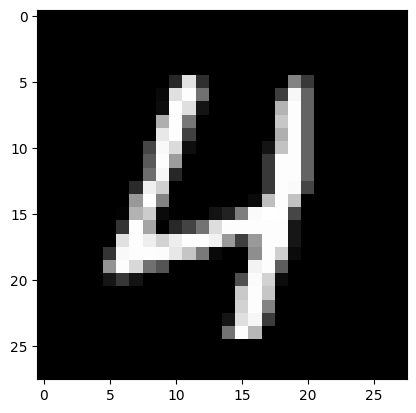

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[0].squeeze(),cmap='gray')
plt.show()

In [ ]:
class DigitsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.network(x)

In [ ]:
model=DigitsClassifier()
optimizer=optim.Adam(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()

In [ ]:
epochs=5

for epoch in range(epochs):
  running_loss=0.0
  for images,labels in train_loader:
    outputs=model(images)
    loss=criterion(outputs,labels)
    running_loss+=loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.2f}')

Epoch 1/5, Loss: 0.40
Epoch 2/5, Loss: 0.20
Epoch 3/5, Loss: 0.14
Epoch 4/5, Loss: 0.11
Epoch 5/5, Loss: 0.10


In [ ]:
model.eval()

total=0
correct=0

with torch.no_grad():
  for images,labels in test_loader:
    outputs=model(images)
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

print(f'Accuracy on the test set: {100*correct/total:2f}%')


Accuracy on the test set: 96.600000%


In [ ]:
total,correct

(10000, 9660)

**CLASSIFICATION REPORT AND CONFUSION MATRIX**

In [ ]:
model.eval()

all_predicted=[]
all_labels=[]

with torch.no_grad():
  for images,labels in test_loader:
    outputs=model(images)
    _,predicted=torch.max(outputs.data,1)

    all_predicted.extend(predicted.numpy())
    all_labels.extend(labels.numpy())

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

report=classification_report(all_labels,all_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.99      0.95      0.97      1010
           4       0.98      0.95      0.96       982
           5       0.97      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.94      0.97      0.96      1028
           8       0.97      0.96      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
cm=confusion_matrix(all_labels,all_predicted)
print(cm)

[[ 970    1    2    0    1    1    2    2    1    0]
 [   0 1124    4    0    0    2    1    1    3    0]
 [   5    1 1005    0    3    1    4   11    2    0]
 [   0    2   18  957    0    9    0   11    9    4]
 [   0    3    5    0  929    0    4    6    0   35]
 [   6    1    0    6    2  856    6    4    7    4]
 [   6    4    1    0   10    5  928    0    4    0]
 [   0    7   14    0    0    0    0 1002    0    5]
 [   7    0    4    2    3    5    6   10  933    4]
 [   4    8    0    5    4    3    2   22    5  956]]


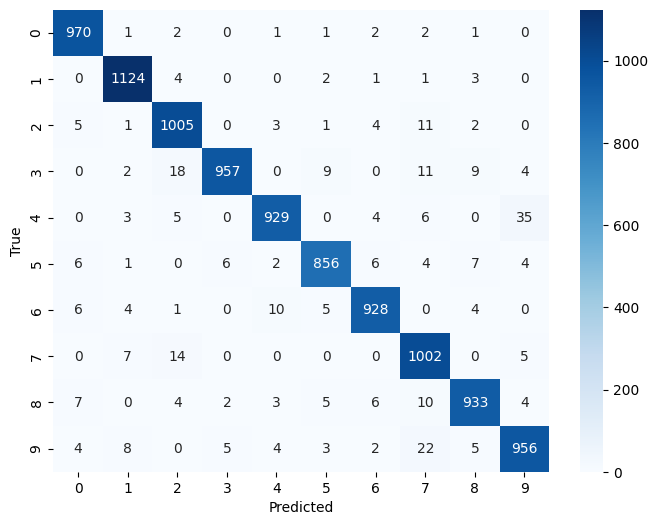

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=range(10),yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()